# SETUP

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Import and Trim Data
df = pd.read_excel ('volcanic_data.xls')
df = df.replace(r'^Not', np.NaN, regex=True)
df = df[['Latitude','Longitude','Magnitude','Year BP','Magma Type']]
df = df.dropna(axis=0, how='any')
df = df.loc[df['Year BP']<10000]

In [3]:
# Add Magma Category Column
filt1 = (df['Magma Type'] == 'Foidite') | (df['Magma Type'] == 'Basalt') | (df['Magma Type'] == 'Tephrite') | (df['Magma Type'] == 'Phonotephrite')
filt2 = (df['Magma Type'] == 'Andesite') | (df['Magma Type'] == 'Trachyandesite') | (df['Magma Type'] == 'Phonolite')
filt3 = (df['Magma Type'] == 'Trachyte') | (df['Magma Type'] == 'Dacite')
filt4 = (df['Magma Type'] == 'Rhyolite')
df['Magma Category']=''
df.loc[filt1,['Magma Category']] = 1.0
df.loc[filt2,['Magma Category']] = 2.0
df.loc[filt3,['Magma Category']] = 3.0
df.loc[filt4,['Magma Category']] = 4.0

# STATIC IMAGE

In [4]:
# Define Background Image
bg_image = 'world_map.jpeg'
img=mpimg.imread(bg_image)
sz_y,sz_x,col_depth = img.shape

In [5]:
# Set Parameters For Data Plotting
x = np.linspace(0,sz_x,40)
y = np.linspace(0,sz_y,40)
long = df.Longitude
lat = -1*(df.Latitude)
long_data_range = np.linspace(-180,180,40)
lat_data_range = np.linspace(-90,90,40)
long_pos = np.interp(long,long_data_range,x)
lat_pos = np.interp(lat,lat_data_range,y)
magnitude = np.asarray(df['Magnitude'])
magmatype = np.asarray(df['Magma Category'])
year = np.asarray(df['Year BP'])

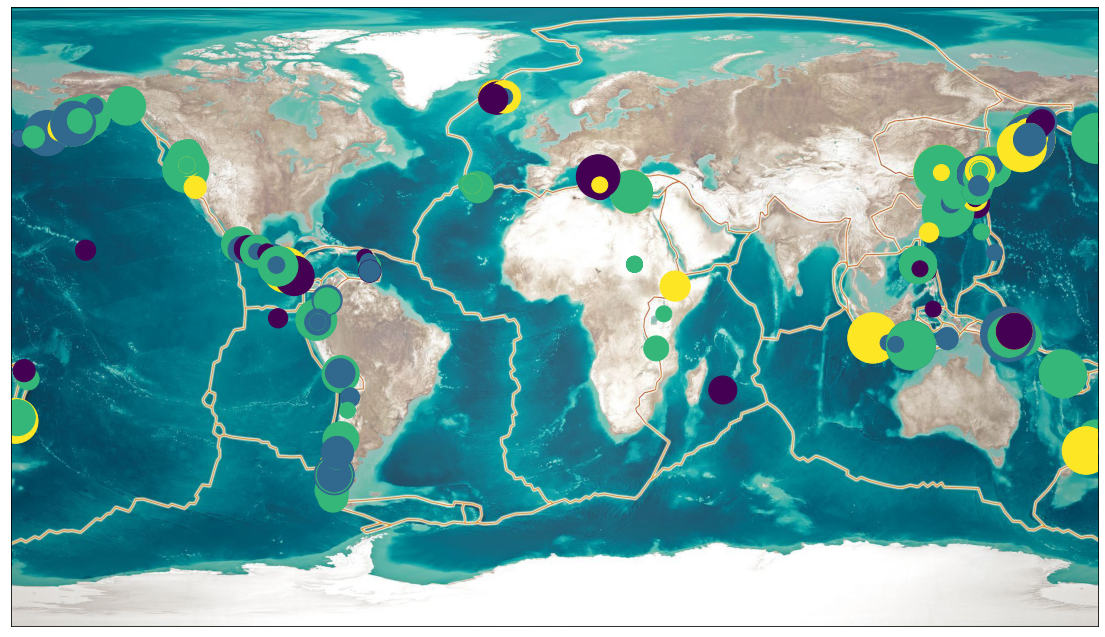

In [6]:
# Print Image
fig, ax = plt.subplots(figsize=(sz_x/100,sz_y/100))
ax.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.scatter(long_pos,lat_pos, c=magmatype, s=magnitude ** 4)
plt.show()

# MOVIE

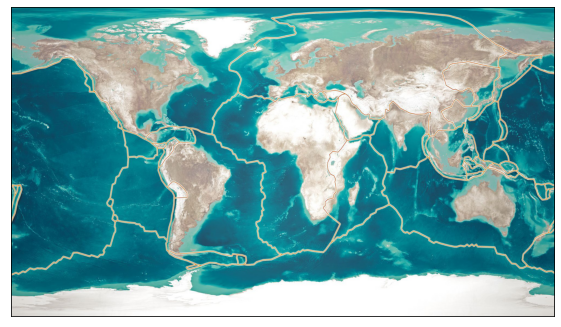

In [11]:
patch_list = []
cmap = cm.autumn
rad_vec = np.linspace(1/200,1/30,len(magnitude))
for ind, val in enumerate(magnitude):
    rad = rad_vec[ind]
    mtype = magmatype[ind]
    val = mtype/np.max(magmatype)
    c_mtype = cmap(val)
    patch1 = patches.Circle((long_pos[ind], lat_pos[ind]), rad, fc=c_mtype, ec='k')
    patch_list.append(patch1)
fig, ax = plt.subplots(figsize=(sz_x/200,sz_y/200))
ax.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ims = []
for i in range(len(patch_list)):
    padd = patch_list[i]
    im = ax.add_patch(padd)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
HTML(ani.to_html5_video())